<a href="https://colab.research.google.com/github/SriNandhiniManikandan/Forecasting-Business-Turnover-using-R/blob/master/Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for basic operations
import pandas as pd
import numpy as np

#for path
from google.colab import drive

#for visualisations
import seaborn as sns
!pip install squarify
import squarify
import matplotlib.pyplot as plt

#for analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules





/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/transaction_data.csv"
df1 = pd.read_csv(path) 
len(df1)

1083818

# EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
df1.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [ ]:
df1.tail()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083815,-1,6361817,Tue Feb 05 05:26:00 IST 2019,497595,DOILY THANK YOU CARD,15,1.15,United Kingdom
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom
1083817,351645,6118145,Tue Aug 21 08:21:00 IST 2018,471849,HEART OF WICKER SMALL,9,2.28,United Kingdom


In [ ]:
type(df1)

pandas.core.frame.DataFrame

In [ ]:
1# !!! gives the all necessary descriptive statistic measure for each coloumn 
df1.describe()


,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem,TotalCost
count,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06
mean,2.410162e+05,6.159417e+06,6.582687e+05,2.865675e+01,9.498798e+00,1.497422e+02
std,1.423364e+05,1.476341e+05,4.526314e+05,6.542432e+02,2.308139e+03,5.532502e+04
min,-1.000000e+00,5.900015e+06,-1.000000e+00,-2.429850e+05,-1.526564e+04,-6.997968e+05
25%,2.593920e+05,6.026856e+06,4.609080e+05,3.000000e+00,1.730000e+00,1.416000e+01
50%,3.020220e+05,6.166611e+06,4.752930e+05,9.000000e+00,2.880000e+00,4.041000e+01
75%,3.413550e+05,6.289569e+06,4.889430e+05,3.000000e+01,5.700000e+00,7.236000e+01
max,3.840270e+05,6.397457e+06,1.894494e+06,2.429850e+05,1.696285e+06,4.071085e+07


In [ ]:
#Gives the Non-Null content data count and the Data type of each coloumn
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [ ]:
df1.corr()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
UserId,1.000000,0.080351,-0.051638,0.018702,-0.000746
TransactionId,0.080351,1.000000,-0.079268,0.000270,-0.002629
ItemCode,-0.051638,-0.079268,1.000000,0.000700,-0.001770
NumberOfItemsPurchased,0.018702,0.000270,0.000700,1.000000,-0.000081
CostPerItem,-0.000746,-0.002629,-0.001770,-0.000081,1.000000


In [ ]:
df1.isna().sum()

UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           2908
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

# FINDING TOTAL COST AND ADDING IT AS A COLOUMN TO EXISTING DATASET 

In [ ]:
a=[]
for i in range (0,len(df1)):
  b=df1['NumberOfItemsPurchased'][i]*df1['CostPerItem'][i]
  a.append(b)
df1['TotalCost'] = np.array(a)

In [ ]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,TotalCost
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,64.80
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,10.20


# DROPPING DUPLICATE ROWS FROM DATSET

In [ ]:
df=df1.drop_duplicates()
len(df)

536572

# FINDING THE TOTALCOST SPENT PER TRANSACTION

In [ ]:
mt1=df.groupby(['TransactionId'])['TotalCost'].sum()
mt1

TransactionId
5900015     576.30
5900026      92.16
5900037    1155.54
5900048     290.34
5900059      73.98
            ...   
6397413     517.68
6397424     584.64
6397435    1366.92
6397446    1405.80
6397457    1034.52
Name: TotalCost, Length: 25900, dtype: float64

# MAXIMUM AMOUNT SPENT PER TRANSACTION

In [ ]:
max_cost=sorted(mt1 ,reverse=True)

print(max_cost[0:1])



[40710850.56]


# FINDING THE AVERAGE AMOUNT SPENT PER TRANSACTION

In [ ]:
mt=df.groupby(['TransactionId'])['TotalCost'].mean()
mt


TransactionId
5900015     82.328571
5900026     46.080000
5900037     96.295000
5900048     72.585000
5900059     73.980000
              ...    
6397413    258.840000
6397424    292.320000
6397435     65.091429
6397446    351.450000
6397457     68.968000
Name: TotalCost, Length: 25900, dtype: float64

# Finding the count and list of unique products in the datset

In [ ]:

print('The count of unique products:',len(df['ItemDescription'].unique()))
print('**********')
print('The list of unique products:',df['ItemDescription'].unique())

The count of unique products: 4224
**********
The list of unique products: ['FAMILY ALBUM WHITE PICTURE FRAME' 'LONDON BUS COFFEE MUG'
 'SET 12 COLOUR PENCILS DOLLY GIRL ' ... 'mouldy'
 '4 GOLD FLOCK CHRISTMAS BALLS' 'BAKING MOULD CUPCAKE CHOCOLATE']


#Finding the count and list of unique transactions in the datset

In [ ]:

print('The count of unique transactions:',len(df['TransactionId'].unique()))
print('**********')
print('The list of unique transactions:',df['TransactionId'].unique())

The count of unique transactions: 25900
**********
The list of unique transactions: [6355745 6283376 6385599 ... 6040947 6272178 5973539]


#Finding the count and list of unique users in the datset

In [ ]:

print('The count of unique users:',len(df['UserId'].unique()))
print('**********')
print('The list of unique users:',df['UserId'].unique())

The count of unique users: 4373
**********
The list of unique users: [278166 337701 267099 ... 329028 374766 376908]


# DATA VISUALISATION



# Frequency of most bought items itemcode wise

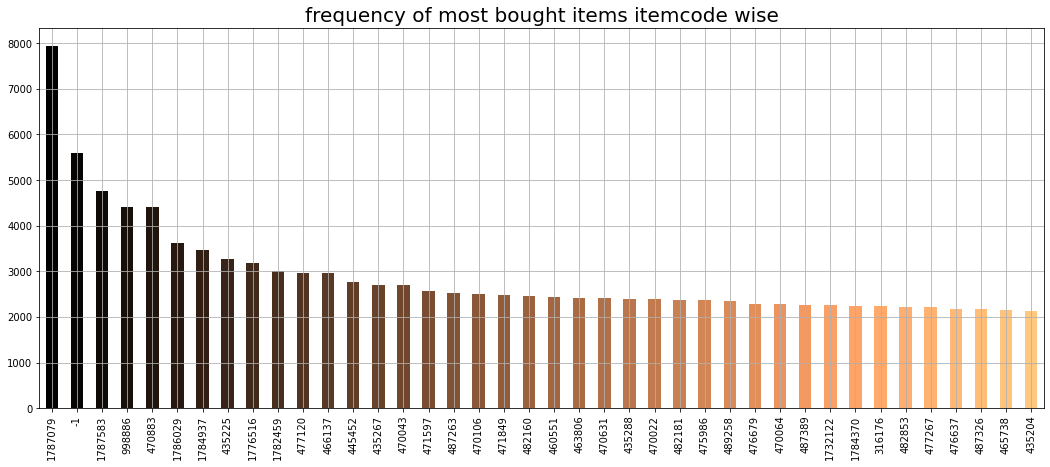

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df['ItemCode'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most bought items itemcode wise', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

# Tree map for most 50 popular items

In [ ]:
y = df['ItemDescription'].value_counts().head(50).to_frame()
y.index

Index(['WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER',
       'JUMBO BAG RED RETROSPOT', 'PARTY BUNTING', 'LUNCH BAG RED RETROSPOT',
       'ASSORTED COLOUR BIRD ORNAMENT', 'SET OF 3 CAKE TINS PANTRY DESIGN',
       'PACK OF 72 RETROSPOT CAKE CASES', 'LUNCH BAG  BLACK SKULL.',
       'NATURAL SLATE HEART CHALKBOARD', 'POSTAGE', 'JUMBO BAG PINK POLKADOT',
       'HEART OF WICKER SMALL', 'JAM MAKING SET WITH JARS',
       'JUMBO STORAGE BAG SUKI', 'PAPER CHAIN KIT 50'S CHRISTMAS',
       'JUMBO SHOPPER VINTAGE RED PAISLEY', 'LUNCH BAG CARS BLUE',
       'LUNCH BAG SPACEBOY DESIGN', 'JAM MAKING SET PRINTED',
       'RECIPE BOX PANTRY YELLOW DESIGN', 'SPOTTY BUNTING',
       'LUNCH BAG SUKI DESIGN', 'ROSES REGENCY TEACUP AND SAUCER',
       'LUNCH BAG PINK POLKADOT', 'WOODEN PICTURE FRAME WHITE FINISH',
       'SET OF 4 PANTRY JELLY MOULDS', 'ALARM CLOCK BAKELIKE RED',
       'GREEN REGENCY TEACUP AND SAUCER', 'LUNCH BAG APPLE DESIGN',
       'VICTORIAN GLASS HANGING T-LI

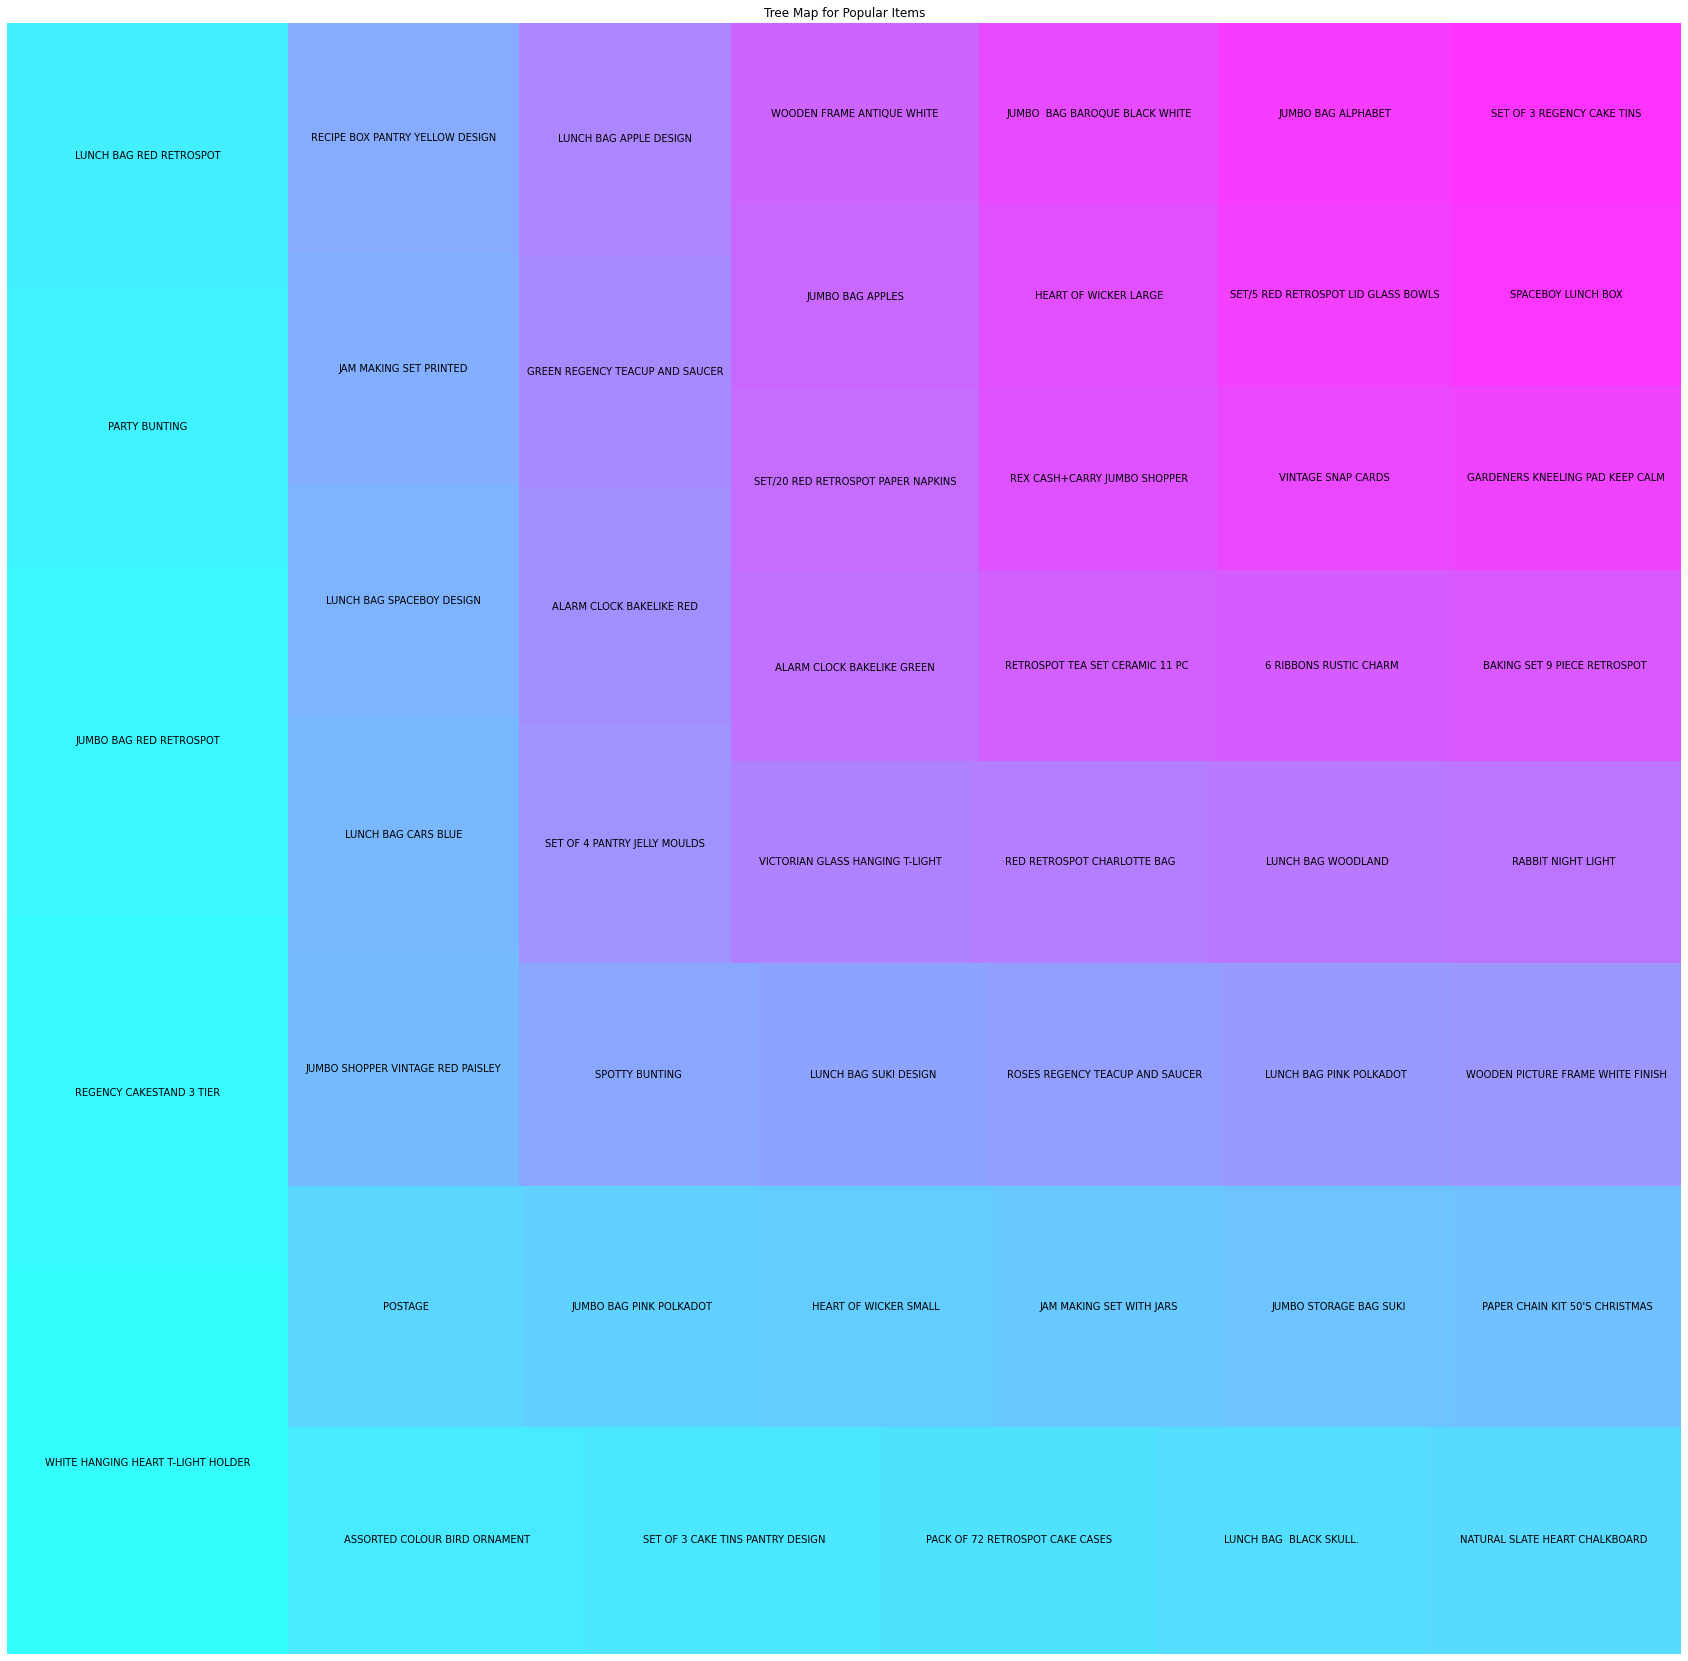

In [ ]:

plt.rcParams['figure.figsize'] = (30, 30)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

# Top 5 countries based on No.of Transactions

In [ ]:
df['Country'].value_counts()[:5]

United Kingdom    990956
Germany            18990
France             17114
EIRE               16392
Spain               5066
Name: Country, dtype: int64

Text(0.5, 1.0, 'Top 5 countries based on no.of transactions')

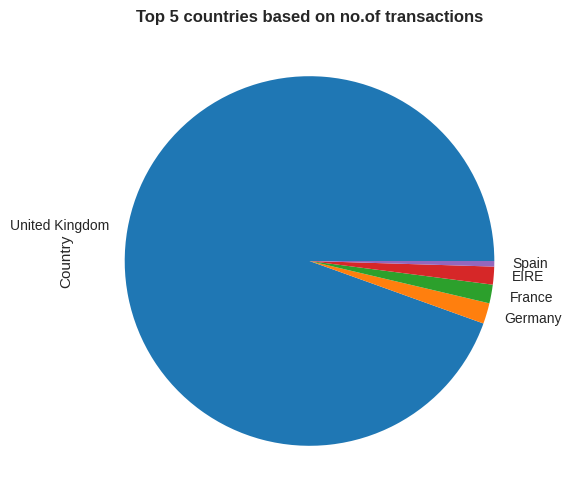

In [ ]:

plt.figure(figsize = (12,6))
df['Country'].value_counts()[:5].plot(kind = 'pie')
plt.title("Top 5 countries based on no.of transactions", weight = 'bold')


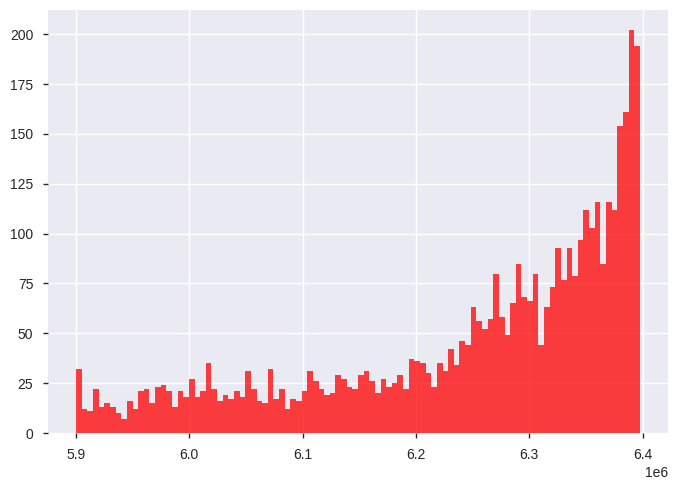

In [ ]:
order_products_cart_prior = df.groupby('UserId')
n_items = order_products_cart_prior['TransactionId'].max()
n, bins, patches = plt.hist(n_items, 100, facecolor="red", alpha=.75, align='mid')
plt.show()

# Top 5 Users who made maximum no.of transactions

In [ ]:
df['UserId'].value_counts()[:5].sort_values(ascending=False)

-1         270160
 374661     15966
 313131     11806
 296016     10256
 267708      9284
Name: UserId, dtype: int64

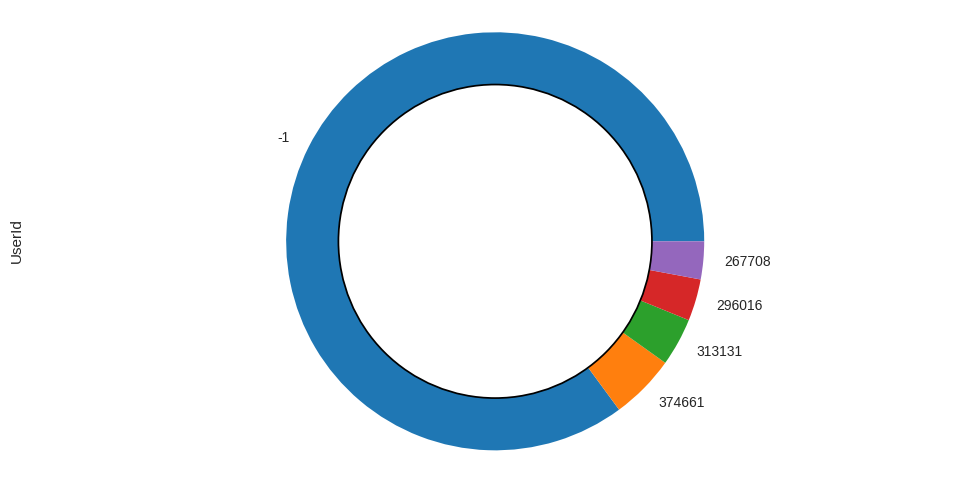

In [ ]:


plt.figure(figsize = (12,6))
df['UserId'].value_counts()[:5].sort_values(ascending=False).plot(kind = 'pie')
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  

# 5 MAXIMUM ORDERS PLACED IN THESE TIMINGS

In [ ]:
order_products 
  group_by(df['UserId'])  
  summarize(n_items = last()) 
  ggplot(aes(x=n_items))+
  geom_histogram(stat="count",fill="red") + 
  geom_rug()+
  coord_cartesian(xlim=c(0,80))

In [ ]:
order_hours = df.TransactionTime.value_counts()
max_order_hours=order_hours.head()
min_order_hours=order_hours.tail()

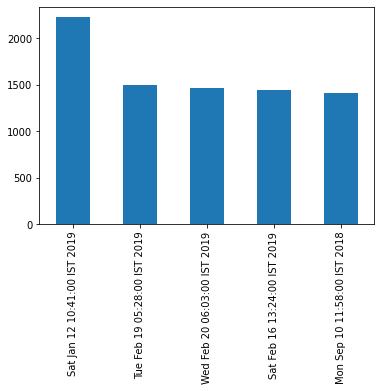

In [ ]:
#No.of orders is maximum in this timings.
max_order_hours.plot.bar()

# 5 LEAST ORDER PLACED IN THESE TIMINGS 

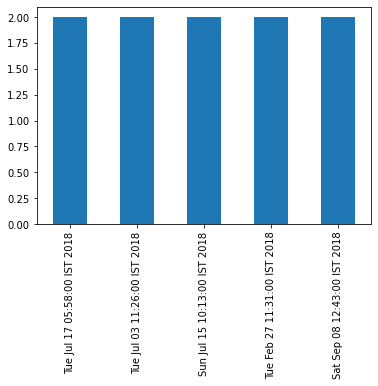

In [ ]:
min_order_hours.plot.bar()
#No.of orders is minimum in this timings.And the no.of orders is 2 .

# PREDICTING THE ITEMS BOUGHT TOGETHER

In [ ]:
df['ItemDescription'] = df['ItemDescription'].str.strip()
df.dropna(axis=0, subset=['TransactionId'], inplace=True)
df.dropna(axis=0, subset=['Country'], inplace=True)
df['TransactionId'] = df['TransactionId'].astype('str')
df = df[~df['TransactionId'].str.contains('C')]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thi

# Forming the basket from which frequent items bought could be found

In [ ]:
basket = (df
          .groupby(['TransactionId', 'ItemCode'])['NumberOfItemsPurchased']
          .sum().unstack().reset_index().fillna(0)
          .set_index('TransactionId'))

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
#basket_sets.drop('POSTAGE', inplace=True, axis=1)

# Finding out the Frequent itemsets

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.083050,(-1)
1,0.020000,(315756)
2,0.030154,(316176)
3,0.014749,(339381)
4,0.011197,(340977)
...,...,...
1146,0.013475,"(487242, 487263, 1787079)"
1147,0.011815,"(487389, 487263, 1787079)"
1148,0.010039,"(469455, 435099, 435204, 435183)"
1149,0.011081,"(1787079, 460551, 470106, 470631)"


# The list of Itemcodes bought together with other itemcode

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules
# !!! Antecedant is the primary product which is bought frequently along with Consequents !!!

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(316176),(-1),0.030154,0.083050,0.011699,0.387964,4.671442,0.009195,1.498196
1,(-1),(316176),0.083050,0.030154,0.011699,0.140865,4.671442,0.009195,1.128862
2,(434931),(-1),0.020193,0.083050,0.011042,0.546845,6.584514,0.009365,2.023480
3,(-1),(434931),0.083050,0.020193,0.011042,0.132961,6.584514,0.009365,1.130062
4,(434952),(-1),0.033320,0.083050,0.017761,0.533024,6.418099,0.014993,1.963592
...,...,...,...,...,...,...,...,...,...
1609,"(476637, 476679)","(476658, 470883)",0.029653,0.015135,0.011622,0.391927,25.895182,0.011173,1.619649
1610,(476658),"(470883, 476637, 476679)",0.029575,0.015753,0.011622,0.392950,24.944645,0.011156,1.621362
1611,(470883),"(476658, 476637, 476679)",0.076795,0.020927,0.011622,0.151332,7.231563,0.010015,1.153659
1612,(476637),"(476658, 470883, 476679)",0.039189,0.012780,0.011622,0.296552,23.204500,0.011121,1.403401


# Finding the Items bought together with the confidence level more than 70%

In [ ]:
rules1=rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.7) ]

In [ ]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
87,(1787751),(-1),0.011351,0.083050,0.010193,0.897959,10.812247,0.009250,8.986108
98,(434931),(1787079),0.020193,0.102664,0.015251,0.755258,7.356595,0.013178,3.666458
120,(434952),(1787079),0.033320,0.102664,0.024865,0.746234,7.268696,0.021444,3.536077
128,(434973),(1787079),0.025676,0.102664,0.018919,0.736842,7.177213,0.016283,3.409876
189,(469476),(435204),0.028687,0.039923,0.020154,0.702557,17.597903,0.019009,3.227771
...,...,...,...,...,...,...,...,...,...
1589,"(470106, 470631, 460551)",(1787079),0.011931,0.102664,0.011081,0.928803,9.047005,0.009856,12.603491
1600,"(476658, 470883, 476637)",(476679),0.013243,0.041158,0.011622,0.877551,21.321362,0.011077,7.830541
1601,"(476658, 470883, 476679)",(476637),0.012780,0.039189,0.011622,0.909366,23.204500,0.011121,10.600946
1603,"(470883, 476637, 476679)",(476658),0.015753,0.029575,0.011622,0.737745,24.944645,0.011156,3.700311


# Exporting the ouput to CSV and storing it in a drive

In [ ]:
rules.to_csv (r'/content/drive/My Drive/export_output.csv', index = False, header=True)


# Add on Analysis
# Based on Item Description

In [ ]:
basket1 = (df
          .groupby(['TransactionId', 'ItemDescription'])['NumberOfItemsPurchased']
          .sum().unstack().reset_index().fillna(0)
          .set_index('TransactionId'))

In [ ]:
basket_sets1 = basket1.applymap(encode_units)

In [ ]:
frequent_itemsets1 = apriori(basket_sets1, min_support=0.01, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.013008,(10 COLOUR SPACEBOY PEN)
1,0.010268,(12 MESSAGE CARDS WITH ENVELOPES)
2,0.014522,(12 PENCIL SMALL TUBE WOODLAND)
3,0.014808,(12 PENCILS SMALL TUBE RED RETROSPOT)
4,0.014522,(12 PENCILS SMALL TUBE SKULL)
...,...,...
1139,0.010022,"(STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG SUKI ..."
1140,0.010268,"(CHARLOTTE BAG SUKI DESIGN, CHARLOTTE BAG PINK..."
1141,0.010636,"(STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG SUKI ..."
1142,0.012313,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP..."


In [ ]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(WHITE HANGING HEART T-LIGHT HOLDER),(6 RIBBONS RUSTIC CHARM),0.092449,0.039066,0.010513,0.113717,2.910912,0.006901,1.084229
1,(6 RIBBONS RUSTIC CHARM),(WHITE HANGING HEART T-LIGHT HOLDER),0.039066,0.092449,0.010513,0.269110,2.910912,0.006901,1.241707
2,(PAPER CHAIN KIT 50'S CHRISTMAS),(60 CAKE CASES VINTAGE CHRISTMAS),0.047452,0.025280,0.011086,0.233621,9.241248,0.009886,1.271850
3,(60 CAKE CASES VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.025280,0.047452,0.011086,0.438511,9.241248,0.009886,1.696470
4,(60 CAKE CASES VINTAGE CHRISTMAS),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.025280,0.033543,0.010227,0.404531,12.059949,0.009379,1.623017
...,...,...,...,...,...,...,...,...,...
1447,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)","(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",0.029616,0.019144,0.010963,0.370166,19.335624,0.010396,1.557324
1448,(JUMBO BAG PINK POLKADOT),"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR...",0.049824,0.015954,0.010963,0.220033,13.792110,0.010168,1.261651
1449,(JUMBO SHOPPER VINTAGE RED PAISLEY),"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKAD...",0.048065,0.016894,0.010963,0.228085,13.500650,0.010151,1.273593
1450,(JUMBO STORAGE BAG SUKI),"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",0.048433,0.015463,0.010963,0.226351,14.638585,0.010214,1.272590


In [ ]:
rules1[ (rules1['lift'] >= 6) &
       (rules1['confidence'] >= 0.7) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47,(PAINTED METAL PEARS ASSORTED),(ASSORTED COLOUR BIRD ORNAMENT),0.015135,0.059519,0.010595,0.700000,11.760962,0.009694,3.134937
52,(BAKING SET SPACEBOY DESIGN),(BAKING SET 9 PIECE RETROSPOT),0.019022,0.038207,0.013663,0.718280,18.799853,0.012936,3.413999
58,(TOILET METAL SIGN),(BATHROOM METAL SIGN),0.016567,0.027530,0.011986,0.723457,26.278789,0.011530,3.516521
68,(CANDLEHOLDER PINK HANGING HEART),(WHITE HANGING HEART T-LIGHT HOLDER),0.016281,0.092449,0.011536,0.708543,7.664175,0.010030,3.113840
96,(CHARLOTTE BAG PINK POLKADOT),(RED RETROSPOT CHARLOTTE BAG),0.030394,0.042297,0.021353,0.702557,16.609974,0.020068,3.219788
...,...,...,...,...,...,...,...,...,...
1425,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(ROSES REGENCY TEACUP AND SAUCER),0.014031,0.043606,0.012313,0.877551,20.124402,0.011701,7.810548
1426,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...",(PINK REGENCY TEACUP AND SAUCER),0.016690,0.031334,0.012313,0.737745,23.544278,0.011790,3.693604
1428,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...","(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.016035,0.031416,0.012313,0.767857,24.441453,0.011809,4.172361
1438,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR...",(JUMBO BAG RED RETROSPOT),0.012640,0.085576,0.010963,0.867314,10.134969,0.009881,6.891632
